# Multiple Linear Regression
A correlation can be viewed as a "Linear Regression" - how well one variable explains another. In this notebook, we will explore "Multiple Linear Regression" - a method to explore how a collection of variables explain the variability in another variable. 

#### Import the modules for this notebook

In [35]:
# import the os, numpy, matplotlib and statsmodels.api modules
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import netCDF4 as nc4
import datetime as dt
import requests

### Read in the data
Read in the temperature, wind, and chlorophyll-a concentration data.

In [36]:
# set a path to where your homework 7 data files will live
# you will want to store data on an external drive because
# it will take up a lot of room
sst_local_folder = 'C:\\Users\\seamu\\ms274\\ms274_final_project\\github_project_data_folder\\AVHRR'

# define a location in the NINO3.4 region
# this region is used as an indicator for ENSO events
#site_longitude = -140
#site_latitude = 0

In [37]:
# create an empty list to store the files
sst_nc_files = []

# write a for loop to loop through the files
for sst_file_name in os.listdir(sst_local_folder):
    

    # if the file is an nc file from SMAP
    if sst_file_name[-2:] == 'nc':
        sst_nc_files.append(sst_file_name)
        #print(sst_file_name)
# sort the file list
sst_nc_files.sort()
#print(sst_nc_files)
#sst_nc_files = sst_nc_files[:100]
# print the number of files that are found
print(len(sst_nc_files))

1798


In [38]:
# define the read_SST_from_file function hereprint()
def read_SST_from_file(sst_file_path):

    dsst = nc4.Dataset(sst_file_path)
    
    sst_longitude = np.array(dsst.variables['lon'])
    # print(sst_longitude)
    sst_latitude = np.array(dsst.variables['lat'])
    analysed_sst_3d = np.array(dsst.variables['analysed_sst'])
    analysed_sst = analysed_sst_3d.reshape(720,1440)
        
    dsst.close()

    #analysed_sst = analysed_sst_3d[0,:,:] # Converting 3D array to a 2D array

    min_x_enso = -170
    min_y_enso = -5
    max_x_enso = -120
    max_y_enso = 5

    min_x_index_enso = np.argmin(np.abs(min_x_enso - sst_longitude))
    min_y_index_enso = np.argmin(np.abs(min_y_enso - sst_latitude))

    max_x_index_enso = np.argmin(np.abs(max_x_enso - sst_longitude))
    max_y_index_enso = np.argmin(np.abs(max_y_enso - sst_latitude))

    # print('x_indices', min_x_index_enso, max_x_index_enso)
    # print('y_indices', min_y_index_enso, max_y_index_enso)

    # sst_enso_longitude = -140
    # sst_enso_latitude = 0
    # sst_long_index = np.argmin(np.abs(sst_longitude-sst_enso_longitude))
    # sst_lat_index = np.argmin(np.abs(sst_latitude-sst_enso_latitude))
    # enso_sst = analysed_sst[sst_lat_index, sst_long_index]

    enso_grid_subset = analysed_sst[min_y_index_enso:max_y_index_enso,min_x_index_enso:max_x_index_enso]
    #print(enso_grid_subset)
    enso_filtered = enso_grid_subset[enso_grid_subset >-10000]
    enso_sst_average = np.nanmean(enso_filtered)
    #if enso_filtered.size == 0:
        #enso_sst_average = np.nan #or any other value to indicate missing data
    #else:
        #enso_sst_average = np.nanmean(enso_filtered) 
    return(enso_sst_average)
    
    # print the indices to be sure these are ordered correctly
    
    #print(np.shape(enso_grid_subset))

In [39]:
# define a function to turn a date, given by year, month, and day, into a decimal year
def YMD_to_DecYr(year, month, day):
    
    # define a date object using the datetime module
    date = dt.datetime(year, month, day)

    # define the start in ordinal units (days since ...)
    start = dt.date(year, 1, 1).toordinal()

    # compute the year_length in ordinal units (365 or 366)
    year_length = dt.date(year+1, 1, 1).toordinal() - start

    # compute the fraction based on the date
    decimal_fraction = (date.toordinal() - start) / year_length
    
    # compute the decimal year
    decimal_year = year + decimal_fraction
    #return
    return(decimal_year)

In [40]:
# make an empty list for strings storing the date
sst_date_list = []
sst_decyrs = []

# loop through the file name
for sst_file_name in sst_nc_files:
    #print(sst_file_name)
    # split the file name and retrieve the year and month strings
    sst_year = sst_file_name.split('_')[0][0:4]
    sst_month = sst_file_name.split('_')[0][4:6]
    sst_day = sst_file_name.split('_')[0][6:8]

    # join the year, month, and day strings with dashes
    # and add the date string to the date_list
    sst_date_string = sst_year+'-'+ sst_month+'-'+ sst_day
    sst_date_list.append(sst_date_string)
    sst_decyr = YMD_to_DecYr(int(sst_year), int(sst_month), int(sst_day))
    sst_decyrs.append(sst_decyr)
        
#print(sst_date_list)
# convert the date list to array with the keyword dtype='datetime64'
sst_date_array = np.array(sst_date_list, dtype ='datetime64')
#print(sst_date_array)
print(len(sst_date_array))
print(np.shape(sst_date_array))
sst_decyrs = np.array(sst_decyrs)

1798
(1798,)


In [41]:
# make an empty list for the sss values
sst_values = []

# loop through the file names
for sst_file_name in sst_nc_files:
    
    # define a file path
    sst_file_path = sst_local_folder + '\\' + sst_file_name

    # use the sss function to find the sss value for this file
    sst = read_SST_from_file(sst_file_path)

    # add the sss value to the list
    sst_values.append(sst)

kelvin = 273.15
sst_values_array = np.array(sst_values)
sst_values_celcius = sst_values_array - kelvin
print(sst_values_celcius)
#print(len(sst_values_celcius))
print(np.shape(sst_values_celcius))


[26.628265 26.822113 26.893677 ... 28.642822 28.579529 28.537079]
(1798,)


Subset the data to remove the NaNs

In [42]:
# # subset the data to remove the NaNs
# # compute the indices where the NaNs occur
# good_indices = ~np.isnan(chl_timeseries[:,1]) # ~ namkes this do the opposite

# # subset each timeseries to the non-NaN indicies
# sst_timeseries_subset = sst_timeseries[good_indices, :]
# wind_timeseries_subset = wind_timeseries[good_indices, :]
# chl_timeseries_subset = chl_timeseries[good_indices, :]

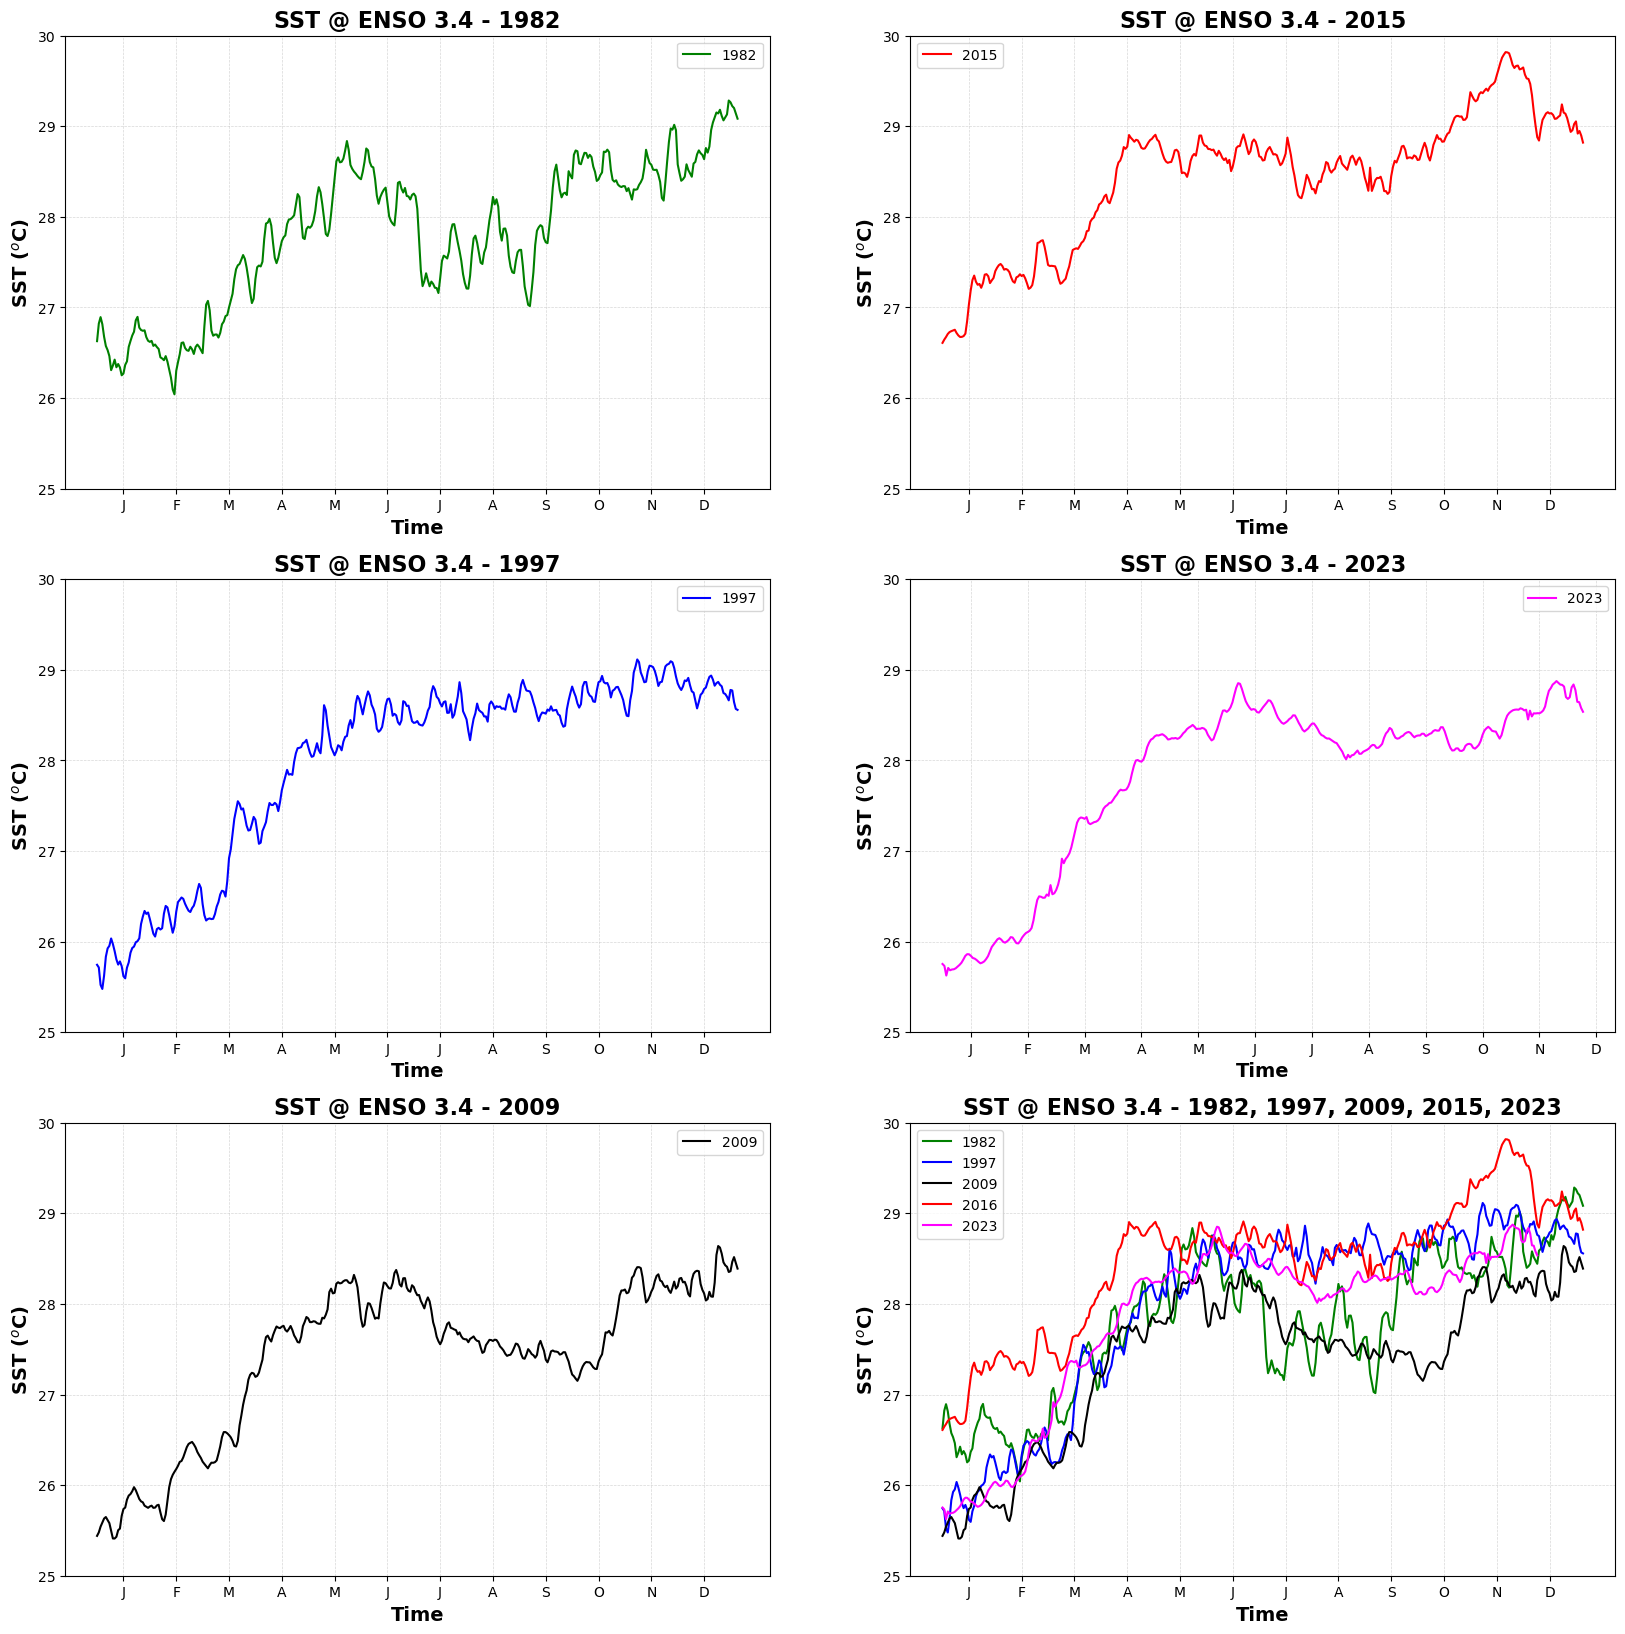

In [43]:
# make a figure of width 10 and height 4
fig = plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
# plot the timeseries
indices_1982 = np.floor(sst_decyrs) == 1982
sst_values_1982 = sst_values_celcius[indices_1982]
plt.plot(sst_decyrs[indices_1982] - 1982, sst_values_1982, label = 1982, color = 'GREEN')

# label the y axis with the units
plt.title('SST @ ENSO 3.4 - 1982', fontsize='16', weight = 'bold')
plt.gca().set_ylabel('SST ($^{o}$C)', fontsize='14', weight = 'bold')
plt.gca().set_xlabel('Time', fontsize='14', weight = 'bold')
xticks = np.arange(15/365, 1, 30/365)
plt.xticks(xticks, ['J','F','M','A','M','J','J','A','S','O','N','D'])

# add grid lines
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.legend()
plt.gca().set_ylim([25, 30])

# make a figure of width 10 and height 4
plt.subplot(3,2,3)
# plot the timeseries
indices_1997 = np.floor(sst_decyrs) == 1997
sst_values_1997 = sst_values_celcius[indices_1997]
plt.plot(sst_decyrs[indices_1997] - 1997, sst_values_1997, label = 1997, color = 'BLUE')

# label the y axis with the units
plt.title('SST @ ENSO 3.4 - 1997', fontsize='16', weight = 'bold')
plt.gca().set_ylabel('SST ($^{o}$C)', fontsize='14', weight = 'bold')
plt.gca().set_xlabel('Time', fontsize='14', weight = 'bold')
xticks = np.arange(15/365, 1, 30/365)
plt.xticks(xticks, ['J','F','M','A','M','J','J','A','S','O','N','D'])

# add grid lines
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.legend()
plt.gca().set_ylim([25, 30])

# make a figure of width 10 and height 4
plt.subplot(3,2,5)
# plot the timeseries
indices_2009 = np.floor(sst_decyrs) == 2009
sst_values_2009 = sst_values_celcius[indices_2009]
plt.plot(sst_decyrs[indices_2009] - 2009, sst_values_2009, label = 2009, color = 'BLACK')

# label the y axis with the units
plt.title('SST @ ENSO 3.4 - 2009', fontsize='16', weight = 'bold')
plt.gca().set_ylabel('SST ($^{o}$C)', fontsize='14', weight = 'bold')
plt.gca().set_xlabel('Time', fontsize='14', weight = 'bold')
xticks = np.arange(15/365, 1, 30/365)
plt.xticks(xticks, ['J','F','M','A','M','J','J','A','S','O','N','D'])

# add grid lines
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.legend()
plt.gca().set_ylim([25, 30])

# make a figure of width 10 and height 4
plt.subplot(3,2,2)
# plot the timeseries
indices_2015 = np.floor(sst_decyrs) == 2015
sst_values_2015 = sst_values_celcius[indices_2015]
plt.plot(sst_decyrs[indices_2015] - 2015, sst_values_2015, label = 2015, color = 'RED')

# label the y axis with the units
plt.title('SST @ ENSO 3.4 - 2015', fontsize='16', weight = 'bold')
plt.gca().set_ylabel('SST ($^{o}$C)', fontsize='14', weight = 'bold')
plt.gca().set_xlabel('Time', fontsize='14', weight = 'bold')
xticks = np.arange(15/365, 1, 30/365)
plt.xticks(xticks, ['J','F','M','A','M','J','J','A','S','O','N','D'])

# add grid lines
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.legend()
plt.gca().set_ylim([25, 30])

# make a figure of width 10 and height 4
plt.subplot(3,2,4)
# plot the timeseries
indices_2023 = np.floor(sst_decyrs) == 2023
sst_values_2023 = sst_values_celcius[indices_2023]
plt.plot(sst_decyrs[indices_2023] - 2023, sst_values_2023, label = 2023, color = 'MAGENTA')

# label the y axis with the units
plt.title('SST @ ENSO 3.4 - 2023', fontsize='16', weight = 'bold')
plt.gca().set_ylabel('SST ($^{o}$C)', fontsize='14', weight = 'bold')
plt.gca().set_xlabel('Time', fontsize='14', weight = 'bold')
xticks = np.arange(15/365, 1, 30/365)
plt.xticks(xticks, ['J','F','M','A','M','J','J','A','S','O','N','D'])

# add grid lines
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.legend()
plt.gca().set_ylim([25, 30])

# make a figure of width 10 and height 4
plt.subplot(3,2,6)
# plot the timeseries
indices_1982 = np.floor(sst_decyrs) == 1982
plt.plot(sst_decyrs[indices_1982] - 1982, sst_values_1982, label = 1982, color = 'GREEN')

indices_1997 = np.floor(sst_decyrs) == 1997
plt.plot(sst_decyrs[indices_1997] - 1997, sst_values_1997, label = 1997, color = 'BLUE')

indices_2009 = np.floor(sst_decyrs) == 2009
plt.plot(sst_decyrs[indices_2009] - 2009, sst_values_2009, label = 2009, color = 'BLACK')

indices_2015 = np.floor(sst_decyrs) == 2015
plt.plot(sst_decyrs[indices_2015] - 2015, sst_values_2015, label = 2016, color = 'RED')

indices_2023 = np.floor(sst_decyrs) == 2023
plt.plot(sst_decyrs[indices_2023] - 2023, sst_values_2023, label = 2023, color = 'MAGENTA')

# label the y axis with the units
plt.title('SST @ ENSO 3.4 - 1982, 1997, 2009, 2015, 2023', fontsize='16', weight = 'bold')
plt.gca().set_ylabel('SST ($^{o}$C)', fontsize='14', weight = 'bold')
plt.gca().set_xlabel('Time', fontsize='14', weight = 'bold')
xticks = np.arange(15/365, 1, 30/365)
plt.xticks(xticks, ['J','F','M','A','M','J','J','A','S','O','N','D'])

# add grid lines
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.legend()
plt.gca().set_ylim([25, 30])

plt.show()

In [44]:
# set a path to where your homework 7 data files will live
# you will want to store data on an external drive because
# it will take up a lot of room
ssh_local_folder = 'C:\\Users\\seamu\\ms274\\ms274_final_project\\github_project_data_folder\\ssh_data'

# define a location in the NINO3.4 region
# this region is used as an indicator for ENSO events
#site_longitude = -190
#site_latitude = -30


In [45]:

# create an empty list to store the files
ssh_nc_files = []

# write a for loop to loop through the files
for ssh_file_name in os.listdir(ssh_local_folder):
    

    # if the file is an nc file from SMAP
    if ssh_file_name[-2:] == 'nc':
        ssh_nc_files.append(ssh_file_name)
        #print(sst_file_name)
# sort the file list
ssh_nc_files.sort()
#print(ssh_nc_files)
#ssh_nc_files = ssh_nc_files[:100]
# print the number of files that are found
print(len(ssh_nc_files))


219


In [46]:

# define the read_SST_from_file function hereprint()
def read_SSH_from_file(ssh_file_path):

    dssh = nc4.Dataset(ssh_file_path)
    
    ssh_longitude = np.array(dssh.variables['Longitude'])
    ssh_latitude = np.array(dssh.variables['Latitude'])
    ssh = np.array(dssh.variables['SLA'])
    #sla_3d = np.array(dssh.variables['SLA'])
    #sla = ssh_3d.reshape(960,2160)
        
    dssh.close()

    ssh = ssh[0,:,:] # Converting 3D array to a 2D array

    min_x_swp = 180
    min_y_swp = -40
    max_x_swp = 200
    max_y_swp = -20
    #ssh_swp_longitude = -190
    #ssh_swp_latitude = -30

    min_x_index_swp = np.argmin(np.abs(min_x_swp - ssh_longitude))
    min_y_index_swp = np.argmin(np.abs(min_y_swp - ssh_latitude))

    max_x_index_swp = np.argmin(np.abs(max_x_swp - ssh_longitude))
    max_y_index_swp = np.argmin(np.abs(max_y_swp - ssh_latitude))

    # print the indices to be sure these are ordered correctly
    #print('x_indices', min_x_index_swp, max_x_index_swp)
    #print('y_indices', min_y_index_swpl, max_y_index_swp)

    #ssh_long_index = np.argmin(np.abs(ssh_longitude-ssh_swp_longitude))
    #ssh_lat_index = np.argmin(np.abs(ssh_latitude-ssh_swp_latitude))

    swp_grid_subset = ssh[min_y_index_swp:max_y_index_swp,min_x_index_swp:max_x_index_swp]
    swp_filtered = swp_grid_subset[swp_grid_subset < 10000]
    swp_ssh_average = np.nanmean(swp_filtered)
    return(swp_ssh_average)
    

In [47]:

# make an empty list for strings storing the date
ssh_date_list = []

# loop through the file name
for ssh_file_name in ssh_nc_files: #[80:]
    #print(ssh_file_name)
    # split the file name and retrieve the year and month strings
    ssh_year = ssh_file_name.split('_')[3][0:4]
    ssh_month = ssh_file_name.split('_')[3][4:6]
    ssh_day = ssh_file_name.split('_')[3][6:8]

    # join the year, month, and day strings with dashes
    # and add the date string to the date_list
    ssh_date_string = ssh_year+'-'+ ssh_month+'-'+ ssh_day
    ssh_date_list.append(ssh_date_string)
#print(ssh_date_list)
# convert the date list to array with the keyword dtype='datetime64'
ssh_date_array = np.array(ssh_date_list, dtype ='datetime64')
#print(ssh_date_array)
print(len(ssh_date_array))
print(np.shape(ssh_date_array))
    

219
(219,)


In [48]:

# make an empty list for the sss values
ssh_values = []

# loop through the file names
for ssh_file_name in ssh_nc_files: #[80:]
    
    # define a file path
    ssh_file_path = ssh_local_folder + '\\' + ssh_file_name

    # use the sss function to find the sss value for this file
    ssh = read_SSH_from_file(ssh_file_path)

    # add the sss value to the list
    ssh_values.append(ssh)

# print(ssh_values)
# print(len(ssh_values))
# print(np.shape(ssh_values))



In [49]:

# define a function to compute average sea surface height
def compute_average_ssh(file_path_list):

    # make the sum and count grids
    sum_grid = np.zeros((960, 2160))
    count_grid = np.zeros((960, 2160))

    # loop through the file paths and add the data from
    # each to the sun and count grids
    for file_path in file_path_list:
        
        # get the wind field from the file
        ds = nc4.Dataset(file_path)
        ssh = np.array(ds.variables['SLA'])
        ds.close()    
        ssh = ssh[0, :, :] # Converts 3D to a 2D array
        
        # mask the wind field and add it to the array
        ssh_masked = np.ma.masked_where(ssh>1000, ssh)
        ssh_mask = ~np.ma.getmaskarray(ssh_masked)
        # add the wind field info to the sum and count grids
        sum_grid[ssh_mask] = sum_grid[ssh_mask] + ssh[ssh_mask]
        count_grid[ssh_mask] = count_grid[ssh_mask] + 1


    # compute the average grid
    averaged_grid = sum_grid
    averaged_grid[count_grid>0] = sum_grid[count_grid>0]/count_grid[count_grid>0]
    averaged_grid = np.ma.masked_where(count_grid==0, averaged_grid)

    # return the average grid
    return(averaged_grid)


In [50]:
# define a function to turn a date, given by year, month, and day, into a decimal year
def YMD_to_DecYr(year, month, day):
    
    # define a date object using the datetime module
    date = dt.datetime(year, month, day)

    # define the start in ordinal units (days since ...)
    start = dt.date(year, 1, 1).toordinal()

    # compute the year_length in ordinal units (365 or 366)
    year_length = dt.date(year+1, 1, 1).toordinal() - start

    # compute the fraction based on the date
    decimal_fraction = (date.toordinal() - start) / year_length
    
    # compute the decimal year
    decimal_year = year + decimal_fraction
    #return
    return(decimal_year)

In [51]:
# swp define a function to turn a date, given by year, month, and day, into a decimal year
# make an empty list for the decimal years
decyrs_ssh = []

# loop through the sept date values and fill in the decimal years list
#
for date in ssh_date_list:
#    print(date)
#     datetime_date = date.astype(dt.datetime)
    yr = int(date[0:4])
    mo = int(date[5:7])
    dy = int(date[8:])
    dec_yr = YMD_to_DecYr(yr, mo, dy)
    decyrs_ssh.append(dec_yr)
    
decyrs_ssh = np.array(decyrs_ssh)
#print(decyrs_ssh)
print(len(decyrs_ssh))


219


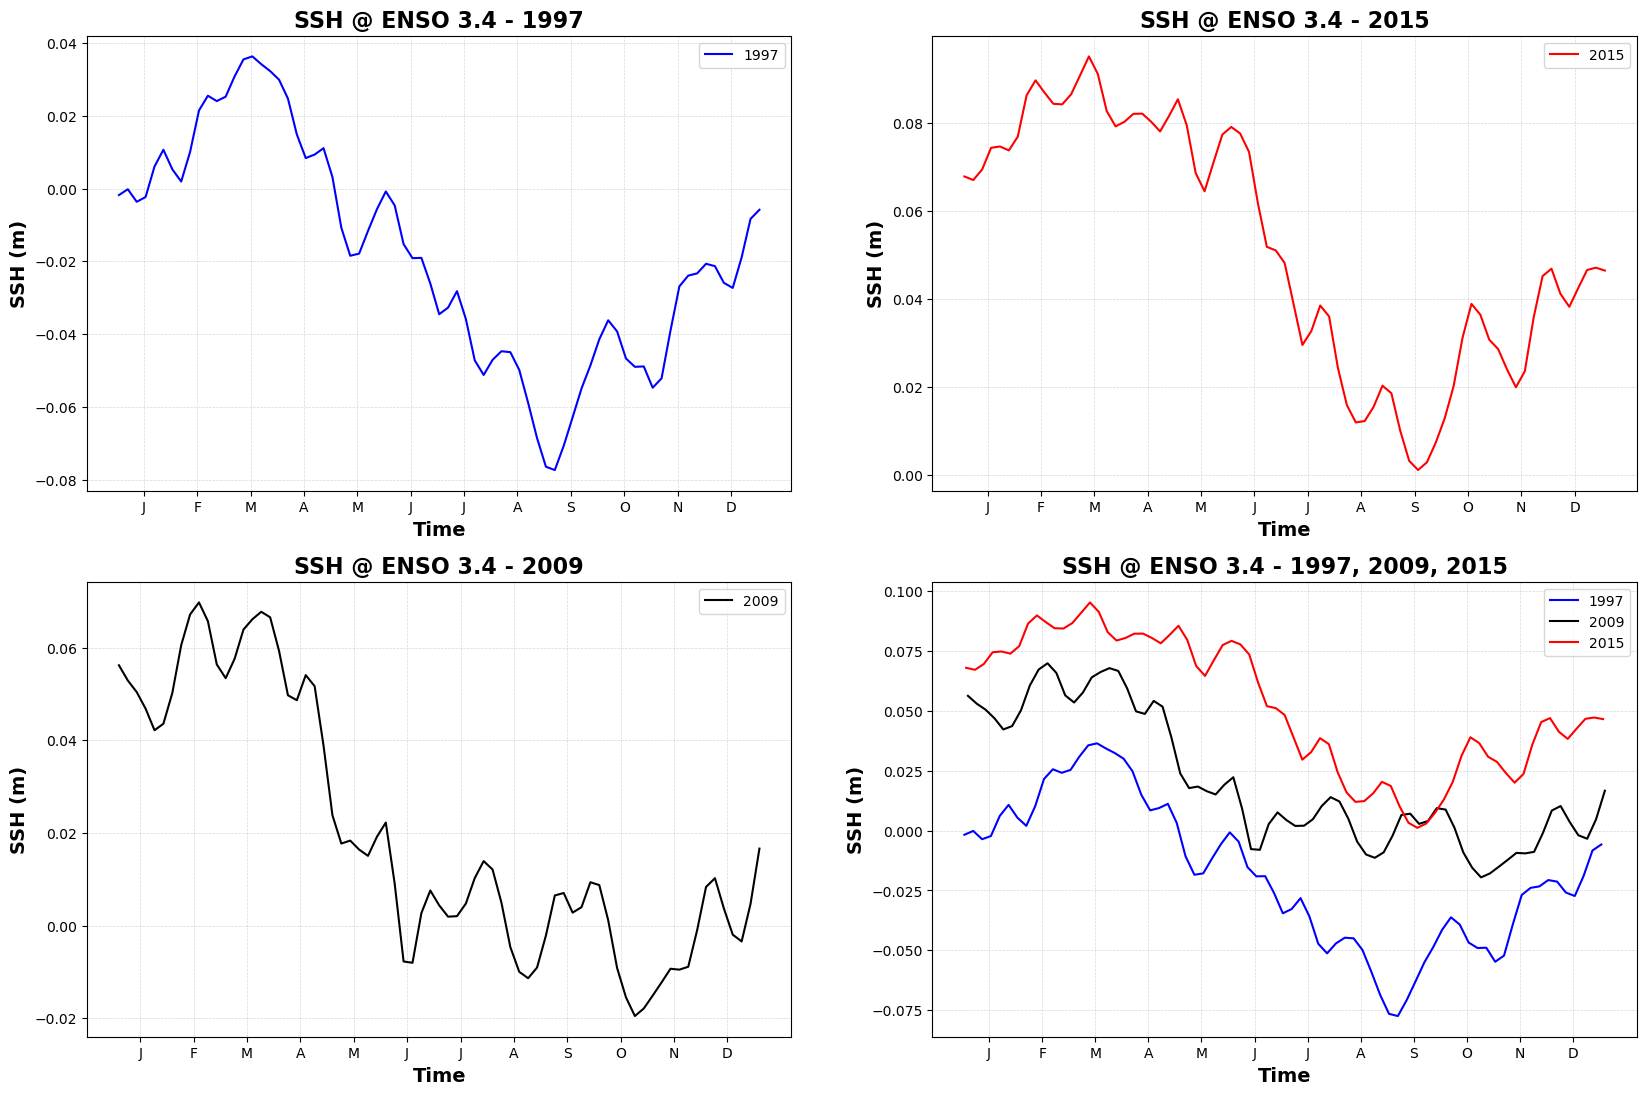

In [52]:

# make a figure of width 10 and height 4
fig = plt.figure(figsize=(20,13))

plt.subplot(2,2,1)
indices_1997 = np.floor(decyrs_ssh) == 1997
plt.plot(decyrs_ssh[indices_1997] - 1997, np.array(ssh_values)[indices_1997], label = 1997, color = 'blue')

# label the y axis with the units
plt.title('SSH @ ENSO 3.4 - 1997', fontsize='16', weight = 'bold')
plt.gca().set_ylabel('SSH (m)', fontsize='14', weight = 'bold')
plt.gca().set_xlabel('Time', fontsize='14', weight = 'bold')
xticks = np.arange(15/365, 1, 30/365)
plt.xticks(xticks, ['J','F','M','A','M','J','J','A','S','O','N','D'])

# add grid lines
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.legend()

# make a figure of width 10 and height 4
plt.subplot(2,2,3)
# plot the timeseries
indices_2009 = np.floor(decyrs_ssh) == 2009
plt.plot(decyrs_ssh[indices_2009] - 2009, np.array(ssh_values)[indices_2009], label = 2009, color = 'black')

# label the y axis with the units
plt.title('SSH @ ENSO 3.4 - 2009', fontsize='16', weight = 'bold')
plt.gca().set_ylabel('SSH (m)', fontsize='14', weight = 'bold')
plt.gca().set_xlabel('Time', fontsize='14', weight = 'bold')
xticks = np.arange(15/365, 1, 30/365)
plt.xticks(xticks, ['J','F','M','A','M','J','J','A','S','O','N','D'])

# add grid lines
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.legend()

# make a figure of width 10 and height 4
plt.subplot(2,2,2)
# plot the timeseries
indices_2015 = np.floor(decyrs_ssh) == 2015
plt.plot(decyrs_ssh[indices_2015] - 2015, np.array(ssh_values)[indices_2015], label = 2015, color = 'red')

# label the y axis with the units
plt.title('SSH @ ENSO 3.4 - 2015', fontsize='16', weight = 'bold')
plt.gca().set_ylabel('SSH (m)', fontsize='14', weight = 'bold')
plt.gca().set_xlabel('Time', fontsize='14', weight = 'bold')
xticks = np.arange(15/365, 1, 30/365)
plt.xticks(xticks, ['J','F','M','A','M','J','J','A','S','O','N','D'])

# add grid lines
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.legend()

# make a figure of width 10 and height 4
plt.subplot(2,2,4)
indices_1997 = np.floor(decyrs_ssh) == 1997
plt.plot(decyrs_ssh[indices_1997] - 1997, np.array(ssh_values)[indices_1997], label = 1997, color = 'blue')

indices_2009 = np.floor(decyrs_ssh) == 2009
plt.plot(decyrs_ssh[indices_2009] - 2009, np.array(ssh_values)[indices_2009], label = 2009, color = 'black')

indices_2015 = np.floor(decyrs_ssh) == 2015
plt.plot(decyrs_ssh[indices_2015] - 2015, np.array(ssh_values)[indices_2015], label = 2015, color = 'red')

# label the y axis with the units
plt.title('SSH @ ENSO 3.4 - 1997, 2009, 2015', fontsize='16', weight = 'bold')
plt.gca().set_ylabel('SSH (m)', fontsize='14', weight = 'bold')
plt.gca().set_xlabel('Time', fontsize='14', weight = 'bold')
xticks = np.arange(15/365, 1, 30/365)
plt.xticks(xticks, ['J','F','M','A','M','J','J','A','S','O','N','D'])

# add grid lines
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.legend()

plt.show()


In [53]:
# Filter data for November 1982
may_1982_indices = [sst_file_name.startswith('198205') for sst_file_name in sst_nc_files]
# Extract SST values for May 1982
sst_may_1982 = sst_values_celcius[may_1982_indices]
# Calculate the average SST for May 1982
average_sst_may_1982 = np.mean(sst_may_1982)
# Print the result
#print("Average SST for May 1982:", average_sst_may_1982)

jun_1982_indices = [sst_file_name.startswith('198206') for sst_file_name in sst_nc_files]
sst_jun_1982 = sst_values_celcius[jun_1982_indices]
average_sst_jun_1982 = np.mean(sst_jun_1982)
#print("Average SST for Jun 1982:", average_sst_jun_1982)

jul_1982_indices = [sst_file_name.startswith('198207') for sst_file_name in sst_nc_files]
sst_jul_1982 = sst_values_celcius[jul_1982_indices]
average_sst_jul_1982 = np.mean(sst_jul_1982)
#print("Average SST for Jul 1982:", average_sst_jul_1982)

aug_1982_indices = [sst_file_name.startswith('198208') for sst_file_name in sst_nc_files]
sst_aug_1982 = sst_values_celcius[aug_1982_indices]
average_sst_aug_1982 = np.mean(sst_aug_1982)
#print("Average SST for Aug 1982:", average_sst_aug_1982)

sep_1982_indices = [sst_file_name.startswith('198209') for sst_file_name in sst_nc_files]
sst_sep_1982 = sst_values_celcius[sep_1982_indices]
average_sst_sep_1982 = np.mean(sst_sep_1982)
#print("Average SST for Sep 1982:", average_sst_sep_1982)

oct_1982_indices = [sst_file_name.startswith('198210') for sst_file_name in sst_nc_files]
sst_oct_1982 = sst_values_celcius[oct_1982_indices]
average_sst_oct_1982 = np.mean(sst_oct_1982)
#print("Average SST for Oct 1982:", average_sst_oct_1982)

nov_1982_indices = [sst_file_name.startswith('198211') for sst_file_name in sst_nc_files]
sst_nov_1982 = sst_values_celcius[nov_1982_indices]
average_sst_nov_1982 = np.mean(sst_nov_1982)
#print("Average SST for Nov 1982:", average_sst_nov_1982)

dec_1982_indices = [sst_file_name.startswith('198212') for sst_file_name in sst_nc_files]
sst_dec_1982 = sst_values_celcius[dec_1982_indices]
average_sst_dec_1982 = np.mean(sst_dec_1982)
#print("Average SST for Dec 1982:", average_sst_dec_1982)

average_sst_sep_nov_1982 =(average_sst_sep_1982 + average_sst_oct_1982 + average_sst_nov_1982)/3
#print("Average SST for Sep-Nov 1982:", average_sst_sep_nov_1982)

average_sst_oct_dec_1982 =(average_sst_oct_1982 + average_sst_nov_1982 + average_sst_dec_1982)/3
#print("Average SST for Oct-Dec 1982:", average_sst_oct_dec_1982)

average_sst_sep_dec_1982 =(average_sst_sep_1982 + average_sst_oct_1982 + average_sst_nov_1982 + average_sst_dec_1982)/4
#print("Average SST for Sep-Dec 1982:", average_sst_sep_dec_1982)

average_sst_may_nov_1982 = (average_sst_may_1982 + average_sst_jun_1982 + average_sst_jul_1982 + average_sst_aug_1982 + average_sst_sep_1982 + average_sst_oct_1982 + average_sst_nov_1982)/7
#print("Average SST for May-Nov 1982:", average_sst_may_nov_1982)
#--------------------------------------------------------------------------------------------------

may_1997_indices = [sst_file_name.startswith('199705') for sst_file_name in sst_nc_files]
sst_may_1997 = sst_values_celcius[may_1997_indices]
average_sst_may_1997 = np.mean(sst_may_1997)
#print("Average SST for May 1997:", average_sst_may_1997)

jun_1997_indices = [sst_file_name.startswith('199706') for sst_file_name in sst_nc_files]
sst_jun_1997 = sst_values_celcius[jun_1997_indices]
average_sst_jun_1997 = np.mean(sst_jun_1997)
#print("Average SST for Jun 1997:", average_sst_jun_1997)

jul_1997_indices = [sst_file_name.startswith('199707') for sst_file_name in sst_nc_files]
sst_jul_1997 = sst_values_celcius[jul_1997_indices]
average_sst_jul_1997 = np.mean(sst_jul_1997)
#print("Average SST for Jul 1997:", average_sst_jul_1997)

aug_1997_indices = [sst_file_name.startswith('199708') for sst_file_name in sst_nc_files]
sst_aug_1997 = sst_values_celcius[aug_1997_indices]
average_sst_aug_1997 = np.mean(sst_aug_1997)
#print("Average SST for Aug 1997:", average_sst_aug_1997)

sep_1997_indices = [sst_file_name.startswith('199709') for sst_file_name in sst_nc_files]
sst_sep_1997 = sst_values_celcius[sep_1997_indices]
average_sst_sep_1997 = np.mean(sst_sep_1997)
#print("Average SST for Sep 1997:", average_sst_sep_1997)

oct_1997_indices = [sst_file_name.startswith('199710') for sst_file_name in sst_nc_files]
sst_oct_1997 = sst_values_celcius[oct_1997_indices]
average_sst_oct_1997 = np.mean(sst_oct_1997)
#print("Average SST for Oct 1997:", average_sst_oct_1997)

nov_1997_indices = [sst_file_name.startswith('199711') for sst_file_name in sst_nc_files]
sst_nov_1997 = sst_values_celcius[nov_1997_indices]
average_sst_nov_1997 = np.mean(sst_nov_1997)
#print("Average SST for Nov 1997:", average_sst_nov_1997)

dec_1997_indices = [sst_file_name.startswith('199712') for sst_file_name in sst_nc_files]
sst_dec_1997 = sst_values_celcius[dec_1997_indices]
average_sst_dec_1997 = np.mean(sst_dec_1997)
#print("Average SST for Dec 1997:", average_sst_dec_1997)

average_sst_sep_nov_1997 =(average_sst_sep_1997 + average_sst_oct_1997 + average_sst_nov_1997)/3
#print("Average SST for Sep-Nov 1997:", average_sst_sep_nov_1997)

average_sst_oct_dec_1997 =(average_sst_oct_1997 + average_sst_nov_1997 + average_sst_dec_1997)/3
#print("Average SST for Oct-Dec 1997:", average_sst_oct_dec_1997)

average_sst_sep_dec_1997 =(average_sst_sep_1997 + average_sst_oct_1997 + average_sst_nov_1997 + average_sst_dec_1997)/4
#print("Average SST for Sep-Dec 1997:", average_sst_sep_dec_1997)

average_sst_may_nov_1997 = (average_sst_may_1997 + average_sst_jun_1997 + average_sst_jul_1997 + average_sst_aug_1997 + average_sst_sep_1997 + average_sst_oct_1997 + average_sst_nov_1997)/7
#print("Average SST for May-Nov 1997:", average_sst_may_nov_1997)
#--------------------------------------------------------------------------------------------------

may_2009_indices = [sst_file_name.startswith('200905') for sst_file_name in sst_nc_files]
sst_may_2009 = sst_values_celcius[may_2009_indices]
average_sst_may_2009 = np.mean(sst_may_2009)
#print("Average SST for May 2009:", average_sst_may_2009)

jun_2009_indices = [sst_file_name.startswith('200906') for sst_file_name in sst_nc_files]
sst_jun_2009 = sst_values_celcius[jun_2009_indices]
average_sst_jun_2009 = np.mean(sst_jun_2009)
#print("Average SST for Jun 2009:", average_sst_jun_2009)

jul_2009_indices = [sst_file_name.startswith('200907') for sst_file_name in sst_nc_files]
sst_jul_2009 = sst_values_celcius[jul_2009_indices]
average_sst_jul_2009 = np.mean(sst_jul_2009)
#print("Average SST for Jul 2009:", average_sst_jul_2009)

aug_2009_indices = [sst_file_name.startswith('200908') for sst_file_name in sst_nc_files]
sst_aug_2009 = sst_values_celcius[aug_2009_indices]
average_sst_aug_2009 = np.mean(sst_aug_2009)
#print("Average SST for Aug 2009:", average_sst_aug_2009)

sep_2009_indices = [sst_file_name.startswith('200909') for sst_file_name in sst_nc_files]
sst_sep_2009 = sst_values_celcius[sep_2009_indices]
average_sst_sep_2009 = np.mean(sst_sep_2009)
#print("Average SST for Sep 2009:", average_sst_sep_2009)

oct_2009_indices = [sst_file_name.startswith('200910') for sst_file_name in sst_nc_files]
sst_oct_2009 = sst_values_celcius[oct_2009_indices]
average_sst_oct_2009 = np.mean(sst_oct_2009)
#print("Average SST for Oct 2009:", average_sst_oct_2009)

nov_2009_indices = [sst_file_name.startswith('200911') for sst_file_name in sst_nc_files]
sst_nov_2009 = sst_values_celcius[nov_2009_indices]
average_sst_nov_2009 = np.mean(sst_nov_2009)
#print("Average SST for Nov 2009:", average_sst_nov_2009)

dec_2009_indices = [sst_file_name.startswith('200912') for sst_file_name in sst_nc_files]
sst_dec_2009 = sst_values_celcius[dec_2009_indices]
average_sst_dec_2009 = np.mean(sst_dec_2009)
#print("Average SST for Dec 2009:", average_sst_dec_2009)

average_sst_sep_nov_2009 =(average_sst_sep_2009 + average_sst_oct_2009 + average_sst_nov_2009)/3
#print("Average SST for Sep-Nov 2009:", average_sst_sep_nov_2009)

average_sst_oct_dec_2009 =(average_sst_oct_2009 + average_sst_nov_2009 + average_sst_dec_2009)/3
#print("Average SST for Oct-Dec 2009:", average_sst_oct_dec_2009)

average_sst_sep_dec_2009 =(average_sst_sep_2009 + average_sst_oct_2009 + average_sst_nov_2009 + average_sst_dec_2009)/4
#print("Average SST for Sep-Dec 2009:", average_sst_sep_dec_2009)

average_sst_may_nov_2009 = (average_sst_may_2009 + average_sst_jun_2009 + average_sst_jul_2009 + average_sst_aug_2009 + average_sst_sep_2009 + average_sst_oct_2009 + average_sst_nov_2009)/7
#print("Average SST for May-Nov 2009:", average_sst_may_nov_2009)
#--------------------------------------------------------------------------------------------------

may_2015_indices = [sst_file_name.startswith('201505') for sst_file_name in sst_nc_files]
sst_may_2015 = sst_values_celcius[may_2015_indices]
average_sst_may_2015 = np.mean(sst_may_2015)
#print("Average SST for May 2015:", average_sst_may_2015)

jun_2015_indices = [sst_file_name.startswith('201506') for sst_file_name in sst_nc_files]
sst_jun_2015 = sst_values_celcius[jun_2015_indices]
average_sst_jun_2015 = np.mean(sst_jun_2015)
#print("Average SST for Jun 2015:", average_sst_jun_2015)

jul_2015_indices = [sst_file_name.startswith('201507') for sst_file_name in sst_nc_files]
sst_jul_2015 = sst_values_celcius[jul_2015_indices]
average_sst_jul_2015 = np.mean(sst_jul_2015)
#print("Average SST for Jul 2015:", average_sst_jul_2015)

aug_2015_indices = [sst_file_name.startswith('201508') for sst_file_name in sst_nc_files]
sst_aug_2015 = sst_values_celcius[aug_2015_indices]
average_sst_aug_2015 = np.mean(sst_aug_2015)
#print("Average SST for Aug 2015:", average_sst_aug_2015)

sep_2015_indices = [sst_file_name.startswith('201509') for sst_file_name in sst_nc_files]
sst_sep_2015 = sst_values_celcius[sep_2015_indices]
average_sst_sep_2015 = np.mean(sst_sep_2015)
#print("Average SST for Sep 2015:", average_sst_sep_2015)

oct_2015_indices = [sst_file_name.startswith('201510') for sst_file_name in sst_nc_files]
sst_oct_2015 = sst_values_celcius[oct_2015_indices]
average_sst_oct_2015 = np.mean(sst_oct_2015)
#print("Average SST for Oct 2015:", average_sst_oct_2015)

nov_2015_indices = [sst_file_name.startswith('201511') for sst_file_name in sst_nc_files]
sst_nov_2015 = sst_values_celcius[nov_2015_indices]
average_sst_nov_2015 = np.mean(sst_nov_2015)
#print("Average SST for Nov 2015:", average_sst_nov_2015)

dec_2015_indices = [sst_file_name.startswith('201512') for sst_file_name in sst_nc_files]
sst_dec_2015 = sst_values_celcius[dec_2015_indices]
average_sst_dec_2015 = np.mean(sst_dec_2015)
#print("Average SST for Dec 2015:", average_sst_dec_2015)

average_sst_sep_nov_2015 =(average_sst_sep_2015 + average_sst_oct_2015 + average_sst_nov_2015)/3
#print("Average SST for Sep-Nov 2015:", average_sst_sep_nov_2015)

average_sst_oct_dec_2015 =(average_sst_oct_2015 + average_sst_nov_2015 + average_sst_dec_2015)/3
#print("Average SST for Oct-Dec 2015:", average_sst_oct_dec_2015)

average_sst_sep_dec_2015 =(average_sst_sep_2015 + average_sst_oct_2015 + average_sst_nov_2015 + average_sst_dec_2015)/4
#print("Average SST for Sep-Dec 2015:", average_sst_sep_dec_2015)

average_sst_may_nov_2015 = (average_sst_may_2015 + average_sst_jun_2015 + average_sst_jul_2015 + average_sst_aug_2015 + average_sst_sep_2015 + average_sst_oct_2015 + average_sst_nov_2015)/7
#print("Average SST for May-Nov 2015:", average_sst_may_nov_2015)
#--------------------------------------------------------------------------------------------------

may_2023_indices = [sst_file_name.startswith('202305') for sst_file_name in sst_nc_files]
sst_may_2023 = sst_values_celcius[may_2023_indices]
average_sst_may_2023 = np.mean(sst_may_2023)
#print("Average SST for May 2023:", average_sst_may_2023)

jun_2023_indices = [sst_file_name.startswith('202306') for sst_file_name in sst_nc_files]
sst_jun_2023 = sst_values_celcius[jun_2023_indices]
average_sst_jun_2023 = np.mean(sst_jun_2023)
#print("Average SST for Jun 2023:", average_sst_jun_2023)

jul_2023_indices = [sst_file_name.startswith('202307') for sst_file_name in sst_nc_files]
sst_jul_2023 = sst_values_celcius[jul_2023_indices]
average_sst_jul_2023 = np.mean(sst_jul_2023)
#print("Average SST for Jul 2023:", average_sst_jul_2023)

aug_2023_indices = [sst_file_name.startswith('202308') for sst_file_name in sst_nc_files]
sst_aug_2023 = sst_values_celcius[aug_2023_indices]
average_sst_aug_2023 = np.mean(sst_aug_2023)
#print("Average SST for Aug 2023:", average_sst_aug_2023)

sep_2023_indices = [sst_file_name.startswith('202309') for sst_file_name in sst_nc_files]
sst_sep_2023 = sst_values_celcius[sep_2023_indices]
average_sst_sep_2023 = np.mean(sst_sep_2023)
#print("Average SST for Sep 2023:", average_sst_sep_2023)

oct_2023_indices = [sst_file_name.startswith('202310') for sst_file_name in sst_nc_files]
sst_oct_2023 = sst_values_celcius[oct_2023_indices]
average_sst_oct_2023 = np.mean(sst_oct_2023)
#print("Average SST for Oct 2023:", average_sst_oct_2023)

nov_2023_indices = [sst_file_name.startswith('202311') for sst_file_name in sst_nc_files]
sst_nov_2023 = sst_values_celcius[nov_2023_indices]
average_sst_nov_2023 = np.mean(sst_nov_2023)
#print("Average SST for Nov 2023:", average_sst_nov_2023)

dec_2023_indices = [sst_file_name.startswith('202312') for sst_file_name in sst_nc_files]
sst_dec_2023 = sst_values_celcius[dec_2023_indices]
average_sst_dec_2023 = np.mean(sst_dec_2023)
#print("Average SST for Dec 2023:", average_sst_dec_2023)

average_sst_sep_nov_2023=(average_sst_sep_2023 + average_sst_oct_2023 + average_sst_nov_2023)/3
#print("Average SST for Sep-Nov 2023:", average_sst_sep_nov_2023)

average_sst_oct_dec_2023 =(average_sst_oct_2023 + average_sst_nov_2023 + average_sst_dec_2023)/3
#print("Average SST for Oct-Dec 2023:", average_sst_oct_dec_2023)

average_sst_sep_dec_2023 =(average_sst_sep_2023 + average_sst_oct_2023 + average_sst_nov_2023 + average_sst_dec_2023)/4
#print("Average SST for Sep-Dec 2023:", average_sst_sep_dec_2023)

average_sst_may_nov_2023 = (average_sst_may_2023 + average_sst_jun_2023 + average_sst_jul_2023 + average_sst_aug_2023 + average_sst_sep_2023 + average_sst_oct_2023 + average_sst_nov_2023)/7
#print("Average SST for May-Nov 2023:", average_sst_may_nov_2023)
#--------------------------------------------------------------------------------------------------

# average_nov_sst = np.array([average_sst_nov_1982, average_sst_nov_1997, average_sst_nov_2009, average_sst_nov_2015])
# #print("Average SST for Nov:", average_nov_sst)

# sep_nov_sst = np.array([average_sst_sep_nov_1982, average_sst_sep_nov_1997, average_sst_sep_nov_2009, average_sst_sep_nov_2015])
# #print("Average SST for Sep-Nov:", sep_nov_sst)

# oct_dec_sst = np.array([average_sst_oct_dec_1982, average_sst_oct_dec_1997, average_sst_oct_dec_2009, average_sst_oct_dec_2015])
# #print("Average SST for Oct-Dec:", oct_dec_sst)

# sep_dec_sst = np.array([average_sst_sep_dec_1982, average_sst_sep_dec_1997, average_sst_sep_dec_2009, average_sst_sep_dec_2015])
# #print("Average SST for Sep-Dec:", sep_dec_sst)

# may_nov_sst = np.array([average_sst_may_nov_1982, average_sst_may_nov_1997, average_sst_may_nov_2009, average_sst_may_nov_2015])
# #print("Average SST for May-Nov 2023:", may_nov_sst)

average_nov_sst = np.array([average_sst_nov_1997, average_sst_nov_2009, average_sst_nov_2015])
#print("Average SST for Nov:", average_nov_sst)

sep_nov_sst = np.array([average_sst_sep_nov_1997, average_sst_sep_nov_2009, average_sst_sep_nov_2015])
#print("Average SST for Sep-Nov:", sep_nov_sst)

oct_dec_sst = np.array([average_sst_oct_dec_1997, average_sst_oct_dec_2009, average_sst_oct_dec_2015])
#print("Average SST for Oct-Dec:", oct_dec_sst)

sep_dec_sst = np.array([average_sst_sep_dec_1997, average_sst_sep_dec_2009, average_sst_sep_dec_2015])
#print("Average SST for Sep-Dec:", sep_dec_sst)

may_nov_sst = np.array([average_sst_may_nov_1997, average_sst_may_nov_2009, average_sst_may_nov_2015])
#print("Average SST for May-Nov 2023:", may_nov_sst)

# nov_ssh = np.array([.1, .2, .15, .25])
#X = np.column_stack([np.ones_like(nov_sst), nov_sst, nov_ssh)])
#jan_enso = np.array([2.2, 2.2, 1.5, 2.5])
jan_enso = np.array([2.2, 1.5, 2.5])

In [54]:
# compute the correlation of past el ninos with 2023
R_sst_1 = np.corrcoef(average_nov_sst, jan_enso)
R_sst_2 = np.corrcoef(sep_nov_sst, jan_enso)
R_sst_3 = np.corrcoef(oct_dec_sst, jan_enso)
R_sst_4 = np.corrcoef(sep_dec_sst, jan_enso)
R_sst_5 = np.corrcoef(may_nov_sst, jan_enso)
# the R value is the off-diagonal element
# compute the correlation of temp with chl
# the R value is the off-diagonal element

#print(R_sst_1)
#print(R_sst_2)
#print(R_sst_3)
#print(R_sst_4)
#print(R_sst_5)

In [55]:
# compute the correlation of temp with chl
R_sst_1 = np.corrcoef(average_nov_sst, jan_enso)
#print(R)
r = R_sst_1[0, 1]
#print(r)
r2_sst_1 = r**2
print(r2_sst_1)

R_sst_2 = np.corrcoef(sep_nov_sst, jan_enso)
r = R_sst_2[0, 1]
r2_sst_2 = r**2
print(r2_sst_2)

R_sst_3 = np.corrcoef(oct_dec_sst, jan_enso)
r = R_sst_3[0, 1]
r2_sst_3 = r**2
print(r2_sst_3)

R_sst_2 = np.corrcoef(sep_dec_sst, jan_enso)
r = R_sst_4[0, 1]
r2_sst_4 = r**2
print(r2_sst_4)

R_sst_3 = np.corrcoef(may_nov_sst, jan_enso)
r = R_sst_5[0, 1]
r2_sst_5 = r**2
print(r2_sst_5)


0.9670288031068079
0.9908888220552853
0.9985541770001326
0.9959043271253362
0.9874228552094064


In [56]:
# compute the line for temperature
p_sst_1 = np.polyfit(average_nov_sst, jan_enso, 1)
print(p_sst_1)

# compute the line for temperature
p_sst_2 = np.polyfit(sep_nov_sst, jan_enso, 1)
print(p_sst_2)

# compute the line for temperature
p_sst_3 = np.polyfit(oct_dec_sst, jan_enso, 1)
print(p_sst_3)

# compute the line for temperature
p_sst_4 = np.polyfit(sep_dec_sst, jan_enso, 1)
print(p_sst_4)

# compute the line for temperature
p_sst_5 = np.polyfit(may_nov_sst, jan_enso, 1)
print(p_sst_5)


[  0.74997961 -19.62305228]
[  0.76150576 -19.64941195]
[  0.87286227 -22.97973186]
[  0.85756504 -22.43166001]
[  0.98519831 -25.9219604 ]


In [57]:

may_1997_indices = [ssh_file_name.split('_')[3].startswith('199705') for ssh_file_name in ssh_nc_files]
ssh_may_1997 = np.array(ssh_values)[may_1997_indices]
average_ssh_may_1997 = np.nanmean(ssh_may_1997)
#print("Average SSH for May 1997:", average_ssh_may_1997)

jun_1997_indices = [ssh_file_name.split('_')[3].startswith('199706') for ssh_file_name in ssh_nc_files]
ssh_jun_1997 = np.array(ssh_values)[jun_1997_indices]
average_ssh_jun_1997 = np.nanmean(ssh_jun_1997)
#print("Average SSH for Jun 1997:", average_ssh_jun_1997)

jul_1997_indices = [ssh_file_name.split('_')[3].startswith('199707') for ssh_file_name in ssh_nc_files]
ssh_jul_1997 = np.array(ssh_values)[jul_1997_indices]
average_ssh_jul_1997 = np.nanmean(ssh_jul_1997)
#print("Average SSH for Jul 1997:", average_ssh_jul_1997)

aug_1997_indices = [ssh_file_name.split('_')[3].startswith('199708') for ssh_file_name in ssh_nc_files]
ssh_aug_1997 = np.array(ssh_values)[aug_1997_indices]
average_ssh_aug_1997 = np.nanmean(ssh_aug_1997)
#print("Average SSH for Aug 1997:", average_ssh_aug_1997)

sep_1997_indices = [ssh_file_name.split('_')[3].startswith('199709') for ssh_file_name in ssh_nc_files]
ssh_sep_1997 = np.array(ssh_values)[sep_1997_indices]
average_ssh_sep_1997 = np.nanmean(ssh_sep_1997)
#print("Average SSH for Sep 1997:", average_ssh_sep_1997)

oct_1997_indices = [ssh_file_name.split('_')[3].startswith('199710') for ssh_file_name in ssh_nc_files]
ssh_oct_1997 = np.array(ssh_values)[oct_1997_indices]
average_ssh_oct_1997 = np.nanmean(ssh_oct_1997)
#print("Average SSH for Oct 1997:", average_ssh_oct_1997)

nov_1997_indices = [ssh_file_name.split('_')[3].startswith('199711') for ssh_file_name in ssh_nc_files]
ssh_nov_1997 = np.array(ssh_values)[nov_1997_indices]
average_ssh_nov_1997 = np.nanmean(ssh_nov_1997)
#print("Average SSH for Nov 1997:", average_ssh_nov_1997)

dec_1997_indices = [ssh_file_name.split('_')[3].startswith('199712') for ssh_file_name in ssh_nc_files]
ssh_dec_1997 = np.array(ssh_values)[dec_1997_indices]
average_ssh_dec_1997 = np.nanmean(ssh_dec_1997)
#print("Average SSH for Dec 1997:", average_ssh_dec_1997)

average_ssh_sep_nov_1997 =(average_ssh_sep_1997 + average_ssh_oct_1997 + average_ssh_nov_1997)/3
#print("Average SSH for Sep-Nov 1997:", average_ssh_sep_nov_1997)

average_ssh_oct_dec_1997 =(average_ssh_oct_1997 + average_ssh_nov_1997 + average_ssh_dec_1997)/3
#print("Average SSH for Oct-Dec 1997:", average_ssh_oct_dec_1997)

average_ssh_sep_dec_1997 =(average_ssh_sep_1997 + average_ssh_oct_1997 + average_ssh_nov_1997 + average_ssh_dec_1997)/4
#print("Average SSH for Sep-Dec 1997:", average_ssh_sep_dec_1997)

average_ssh_may_nov_1997 = (average_ssh_may_1997 + average_ssh_jun_1997 + average_ssh_jul_1997 + average_ssh_aug_1997 + average_ssh_sep_1997 + average_ssh_oct_1997 + average_ssh_nov_1997)/7
#print("Average SSH for May-Nov 1997:", average_ssh_may_nov_1997)
#--------------------------------------------------------------------------------------------------


may_2009_indices = [ssh_file_name.split('_')[3].startswith('200905') for ssh_file_name in ssh_nc_files]
ssh_may_2009 = np.array(ssh_values)[may_2009_indices]
average_ssh_may_2009 = np.nanmean(ssh_may_2009)
#print("Average SSH for May 2009:", average_ssh_may_2009)

jun_2009_indices = [ssh_file_name.split('_')[3].startswith('200906') for ssh_file_name in ssh_nc_files]
ssh_jun_2009 = np.array(ssh_values)[jun_2009_indices]
average_ssh_jun_2009 = np.nanmean(ssh_jun_2009)
#print("Average SSH for Jun 2009:", average_ssh_jun_2009)

jul_2009_indices = [ssh_file_name.split('_')[3].startswith('200907') for ssh_file_name in ssh_nc_files]
ssh_jul_2009 = np.array(ssh_values)[jul_2009_indices]
average_ssh_jul_2009 = np.nanmean(ssh_jul_2009)
#print("Average SSH for Jul 2009:", average_ssh_jul_2009)

aug_2009_indices = [ssh_file_name.split('_')[3].startswith('200908') for ssh_file_name in ssh_nc_files]
ssh_aug_2009 = np.array(ssh_values)[aug_2009_indices]
average_ssh_aug_2009 = np.nanmean(ssh_aug_2009)
#print("Average SSH for Aug 2009:", average_ssh_aug_2009)

sep_2009_indices = [ssh_file_name.split('_')[3].startswith('200909') for ssh_file_name in ssh_nc_files]
ssh_sep_2009 = np.array(ssh_values)[sep_2009_indices]
average_ssh_sep_2009 = np.nanmean(ssh_sep_2009)
#print("Average SSH for Sep 2009:", average_ssh_sep_2009)

oct_2009_indices = [ssh_file_name.split('_')[3].startswith('200910') for ssh_file_name in ssh_nc_files]
ssh_oct_2009 = np.array(ssh_values)[oct_2009_indices]
average_ssh_oct_2009 = np.nanmean(ssh_oct_2009)
#print("Average SSH for Oct 2009:", average_ssh_oct_2009)

nov_2009_indices = [ssh_file_name.split('_')[3].startswith('200911') for ssh_file_name in ssh_nc_files]
ssh_nov_2009 = np.array(ssh_values)[nov_2009_indices]
average_ssh_nov_2009 = np.nanmean(ssh_nov_2009)
#print("Average SSH for Nov 2009:", average_ssh_nov_2009)

dec_2009_indices = [ssh_file_name.split('_')[3].startswith('200912') for ssh_file_name in ssh_nc_files]
ssh_dec_2009 = np.array(ssh_values)[dec_2009_indices]
average_ssh_dec_2009 = np.nanmean(ssh_dec_2009)
#print("Average SSH for Dec 2009:", average_ssh_dec_2009)

average_ssh_sep_nov_2009 =(average_ssh_sep_2009 + average_ssh_oct_2009 + average_ssh_nov_2009)/3
#print("Average SSH for Sep-Nov 2009:", average_ssh_sep_nov_2009)

average_ssh_oct_dec_2009 =(average_ssh_oct_2009 + average_ssh_nov_2009 + average_ssh_dec_2009)/3
#print("Average SSH for Oct-Dec 2009:", average_ssh_oct_dec_2009)

average_ssh_sep_dec_2009 =(average_ssh_sep_2009 + average_ssh_oct_2009 + average_ssh_nov_2009 + average_ssh_dec_2009)/4
#print("Average SSH for Sep-Dec 2009:", average_ssh_sep_dec_2009)

average_ssh_may_nov_2009 = (average_ssh_may_2009 + average_ssh_jun_2009 + average_ssh_jul_2009 + average_ssh_aug_2009 + average_ssh_sep_2009 + average_ssh_oct_2009 + average_ssh_nov_2009)/7
#print("Average SSH for May-Nov 2009:", average_ssh_may_nov_2009)
#--------------------------------------------------------------------------------------------------

may_2015_indices = [ssh_file_name.split('_')[3].startswith('201505') for ssh_file_name in ssh_nc_files]
ssh_may_2015 = np.array(ssh_values)[may_2015_indices]
average_ssh_may_2015 = np.nanmean(ssh_may_2015)
#print("Average SSH for May 2015:", average_ssh_may_2015)

jun_2015_indices = [ssh_file_name.split('_')[3].startswith('201506') for ssh_file_name in ssh_nc_files]
ssh_jun_2015 = np.array(ssh_values)[jun_2015_indices]
average_ssh_jun_2015 = np.nanmean(ssh_jun_2015)
#print("Average SSH for Jun 2015:", average_ssh_jun_2015)

jul_2015_indices = [ssh_file_name.split('_')[3].startswith('201507') for ssh_file_name in ssh_nc_files]
ssh_jul_2015 = np.array(ssh_values)[jul_2015_indices]
average_ssh_jul_2015 = np.nanmean(ssh_jul_2015)
#print("Average SSH for Jul 2015:", average_ssh_jul_2015)

aug_2015_indices = [ssh_file_name.split('_')[3].startswith('201508') for ssh_file_name in ssh_nc_files]
ssh_aug_2015 = np.array(ssh_values)[aug_2015_indices]
average_ssh_aug_2015 = np.nanmean(ssh_aug_2015)
#print("Average SSH for Aug 2015:", average_ssh_aug_2015)

sep_2015_indices = [ssh_file_name.split('_')[3].startswith('201509') for ssh_file_name in ssh_nc_files]
ssh_sep_2015 = np.array(ssh_values)[sep_2015_indices]
average_ssh_sep_2015 = np.nanmean(ssh_sep_2015)
#print("Average SSH for Sep 2015:", average_ssh_sep_2015)

oct_2015_indices = [ssh_file_name.split('_')[3].startswith('201510') for ssh_file_name in ssh_nc_files]
ssh_oct_2015 = np.array(ssh_values)[oct_2015_indices]
average_ssh_oct_2015 = np.nanmean(ssh_oct_2015)
#print("Average SSH for Oct 2015:", average_ssh_oct_2015)

nov_2015_indices = [ssh_file_name.split('_')[3].startswith('201511') for ssh_file_name in ssh_nc_files]
ssh_nov_2015 = np.array(ssh_values)[nov_2015_indices]
average_ssh_nov_2015 = np.nanmean(ssh_nov_2015)
#print("Average SSH for Nov 2015:", average_ssh_nov_2015)

dec_2015_indices = [ssh_file_name.split('_')[3].startswith('201512') for ssh_file_name in ssh_nc_files]
ssh_dec_2015 = np.array(ssh_values)[dec_2015_indices]
average_ssh_dec_2015 = np.nanmean(ssh_dec_2015)
#print("Average SSH for Dec 2015:", average_ssh_dec_2015)

average_ssh_sep_nov_2015 =(average_ssh_sep_2015 + average_ssh_oct_2015 + average_ssh_nov_2015)/3
#print("Average SSH for Sep-Nov 2015:", average_ssh_sep_nov_2015)

average_ssh_oct_dec_2015 =(average_ssh_oct_2015 + average_ssh_nov_2015 + average_ssh_dec_2015)/3
#print("Average SSH for Oct-Dec 2015:", average_ssh_oct_dec_2015)

average_ssh_sep_dec_2015 =(average_ssh_sep_2015 + average_ssh_oct_2015 + average_ssh_nov_2015 + average_ssh_dec_2015)/4
#print("Average SSH for Sep-Dec 2015:", average_ssh_sep_dec_2015)

average_ssh_may_nov_2015 = (average_ssh_may_2015 + average_ssh_jun_2015 + average_ssh_jul_2015 + average_ssh_aug_2015 + average_ssh_sep_2015 + average_ssh_oct_2015 + average_ssh_nov_2015)/7
#print("Average SSH for May-Nov 2015:", average_ssh_may_nov_2015)
#--------------------------------------------------------------------------------------------------


average_nov_ssh = np.array([average_ssh_nov_1997, average_ssh_nov_2009, average_ssh_nov_2015])
#print("Average SSH for Nov:", average_nov_ssh)

sep_nov_ssh = np.array([average_ssh_sep_nov_1997, average_ssh_sep_nov_2009, average_ssh_sep_nov_2015])
#print("Average SSH for Sep-Nov:", sep_nov_ssh)

oct_dec_ssh = np.array([average_ssh_oct_dec_1997, average_ssh_oct_dec_2009, average_ssh_oct_dec_2015])
#print("Average SSH for Oct-Dec:", oct_dec_ssh)

sep_dec_ssh = np.array([average_ssh_sep_dec_1997, average_ssh_sep_dec_2009, average_ssh_sep_dec_2015])
#print("Average SSH for Sep-Dec:", sep_dec_ssh)

may_nov_ssh = np.array([average_ssh_may_nov_1997, average_ssh_may_nov_2009, average_ssh_may_nov_2015])
#print("Average SSHT for May-Nov 2023:", may_nov_ssh)

# nov_ssh = np.array([.1, .2, .15, .25])
#X = np.column_stack([np.ones_like(nov_sst), nov_sst, nov_ssh)])
jan_enso = np.array([2.2, 1.5, 2.5])

In [58]:
# compute the correlation of past el ninos with 2023
R_ssh_1 = np.corrcoef(average_nov_ssh, jan_enso)
R_ssh_2 = np.corrcoef(sep_nov_ssh, jan_enso)
R_ssh_3 = np.corrcoef(oct_dec_ssh, jan_enso)
R_ssh_4 = np.corrcoef(sep_dec_ssh, jan_enso)
R_ssh_5 = np.corrcoef(may_nov_ssh, jan_enso)
# the R value is the off-diagonal element
# compute the correlation of temp with chl
# the R value is the off-diagonal element

print(R_ssh_1)
print(R_ssh_2)
print(R_ssh_3)
print(R_ssh_4)
print(R_ssh_5)

[[1.        0.3981722]
 [0.3981722 1.       ]]
[[1.         0.16972553]
 [0.16972553 1.        ]]
[[1.         0.38030551]
 [0.38030551 1.        ]]
[[1.         0.23119492]
 [0.23119492 1.        ]]
[[1.         0.26722138]
 [0.26722138 1.        ]]


In [59]:
# compute the correlation of temp with chl
R_ssh_1 = np.corrcoef(average_nov_ssh, jan_enso)
#print(R)
r = R_ssh_1[0, 1]
#print(r)
r2_ssh_1 = r**2
print(r2_ssh_1)

R_ssh_2 = np.corrcoef(sep_nov_ssh, jan_enso)
r = R_ssh_2[0, 1]
r2_ssh_2 = r**2
print(r2_ssh_2)

R_ssh_3 = np.corrcoef(oct_dec_ssh, jan_enso)
r = R_ssh_3[0, 1]
r2_ssh_3 = r**2
print(r2_ssh_3)

R_ssh_2 = np.corrcoef(sep_dec_ssh, jan_enso)
r = R_ssh_4[0, 1]
r2_ssh_4 = r**2
print(r2_ssh_4)

R_ssh_3 = np.corrcoef(may_nov_ssh, jan_enso)
r = R_ssh_5[0, 1]
r2_ssh_5 = r**2
print(r2_ssh_5)


0.1585410996834987
0.02880675482830041
0.14463228052627283
0.0534510931161844
0.07140726541215328


In [60]:
# compute the line for temperature
p_ssh_1 = np.polyfit(average_nov_ssh, jan_enso, 1)
print(p_ssh_1)

# compute the line for temperature
p_ssh_2 = np.polyfit(sep_nov_ssh, jan_enso, 1)
print(p_ssh_2)

# compute the line for temperature
p_ssh_3 = np.polyfit(oct_dec_ssh, jan_enso, 1)
print(p_ssh_3)

# compute the line for temperature
p_ssh_4 = np.polyfit(sep_dec_ssh, jan_enso, 1)
print(p_ssh_4)

# compute the line for temperature
p_ssh_5 = np.polyfit(may_nov_ssh, jan_enso, 1)
print(p_ssh_5)


[6.38366655 2.07483044]
[2.51558516 2.0880993 ]
[5.76876152 2.06502892]
[3.53811904 2.08020426]
[3.67788555 2.06269011]


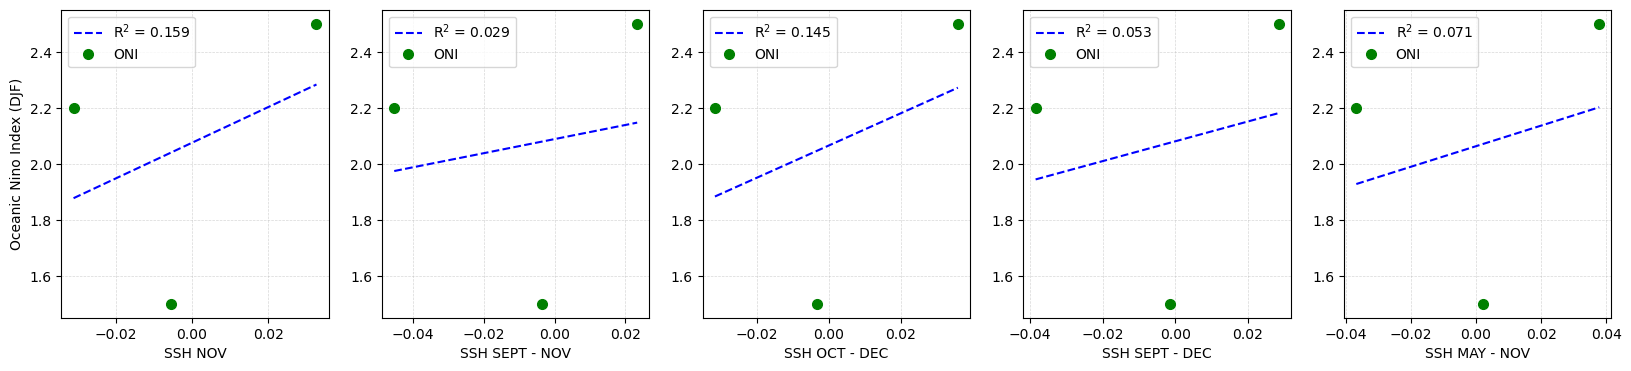

In [61]:
# make two figures (left and right) for chl vs temp, and chl vs wind

fig = plt.figure(figsize=(20,4))

plt.subplot(1,5,1)
plt.plot(average_nov_ssh, p_ssh_1[0] *average_nov_ssh+p_ssh_1[1], 'b--', 
         label = 'R$^2$ = '+str(round(r2_ssh_1,3)))
plt.plot(average_nov_ssh, jan_enso, 'g.', markersize=14 , label = "ONI")
#plt.plot(average_ssh_nov_2023, 2.0, 'r.', markersize=14, label = "JAN 2023")
plt.xlabel('SSH NOV')
plt.ylabel('Oceanic Nino Index (DJF)')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc = 'upper left')
# plt.gca().set_xlim([25, 30])
# plt.gca().set_ylim([25, 30])

plt.subplot(1,5,2)
plt.plot(sep_nov_ssh, p_ssh_2[0] *sep_nov_ssh+p_ssh_2[1], 'b--', 
         label = 'R$^2$ = '+str(round(r2_ssh_2,3)))
plt.plot(sep_nov_ssh, jan_enso, 'g.', markersize=14 , label = "ONI")
#plt.plot(average_ssh_sep_nov_2023, 2.058, 'r.', markersize=14, label = "JAN 2023")
plt.xlabel('SSH SEPT - NOV')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc = 'upper left')
# plt.gca().set_xlim([25, 30])
# plt.gca().set_ylim([25, 30])

plt.subplot(1,5,3)
plt.plot(oct_dec_ssh, p_ssh_3[0] *oct_dec_ssh+p_ssh_3[1], 'b--', 
         label = 'R$^2$ = '+str(round(r2_ssh_3,3)))
plt.plot(oct_dec_ssh, jan_enso, 'g.', markersize=14 , label = "ONI")
#plt.plot(average_ssh_oct_dec_2023, 1.975, 'r.', markersize=14, label = "JAN 2023")
plt.xlabel('SSH OCT - DEC')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc = 'upper left')
# plt.gca().set_xlim([25, 30])
# plt.gca().set_ylim([25, 30])

plt.subplot(1,5,4)
plt.plot(sep_dec_ssh, p_ssh_4[0] *sep_dec_ssh+p_ssh_4[1], 'b--', 
         label = 'R$^2$ = '+str(round(r2_ssh_4,3)))
plt.plot(sep_dec_ssh, jan_enso, 'g.', markersize=14 , label = "ONI")
#plt.plot(average_ssh_sep_dec_2023, 2.04, 'r.', markersize=14, label = "JAN 2023")
plt.xlabel('SSH SEPT - DEC')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc = 'upper left')
# plt.gca().set_xlim([25, 30])
# plt.gca().set_ylim([25, 30])

plt.subplot(1,5,5)
plt.plot(may_nov_ssh, p_ssh_5[0] *may_nov_ssh+p_ssh_5[1], 'b--', 
         label = 'R$^2$ = '+str(round(r2_ssh_5,3)))
plt.plot(may_nov_ssh, jan_enso, 'g.', markersize=14 , label = "ONI")
#plt.plot(average_ssh_may_nov_2023, 2.14, 'r.', markersize=14, label = "JAN 2023")
plt.xlabel('SSH MAY - NOV')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc = 'upper left')
# plt.gca().set_xlim([25, 30])
# plt.gca().set_ylim([25, 30])


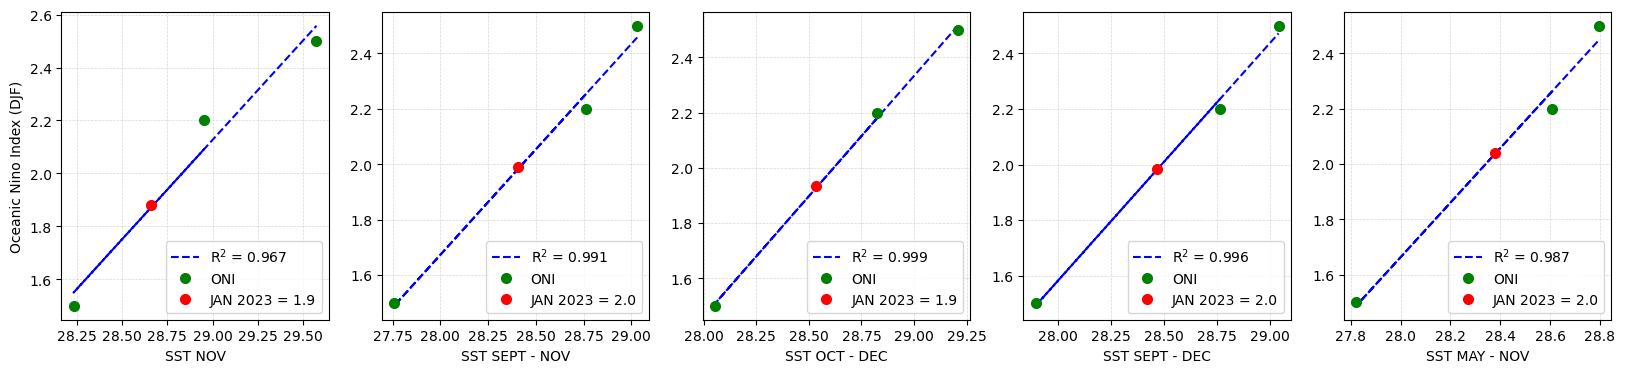

In [62]:
# make two figures (left and right) for chl vs temp, and chl vs wind

fig = plt.figure(figsize=(20,4))

plt.subplot(1,5,1)
plt.plot(average_nov_sst, p_sst_1[0] *average_nov_sst+p_sst_1[1], 'b--', 
         label = 'R$^2$ = '+str(round(r2_sst_1,3)))
plt.plot(average_nov_sst, jan_enso, 'g.', markersize=14 , label = 'ONI')
plt.plot(average_sst_nov_2023, 1.88, 'r.', markersize=14, label = 'JAN 2023 = 1.9')
plt.xlabel('SST NOV')
plt.ylabel('Oceanic Nino Index (DJF)')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc = 'lower right')
# plt.gca().set_xlim([25, 30])
# plt.gca().set_ylim([25, 30])

plt.subplot(1,5,2)
plt.plot(sep_nov_sst, p_sst_2[0] *sep_nov_sst+p_sst_2[1], 'b--', 
         label = 'R$^2$ = '+str(round(r2_sst_2,3)))
plt.plot(sep_nov_sst, jan_enso, 'g.', markersize=14 , label = 'ONI')
plt.plot(average_sst_sep_nov_2023, 1.99, 'r.', markersize=14, label = 'JAN 2023 = 2.0')
plt.xlabel('SST SEPT - NOV')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc = 'lower right')
# plt.gca().set_xlim([25, 30])
# plt.gca().set_ylim([25, 30])

plt.subplot(1,5,3)
plt.plot(oct_dec_sst, p_sst_3[0] *oct_dec_sst+p_sst_3[1], 'b--', 
         label = 'R$^2$ = '+str(round(r2_sst_3,3)))
plt.plot(oct_dec_sst, jan_enso, 'g.', markersize=14 , label = 'ONI')
plt.plot(average_sst_oct_dec_2023, 1.935, 'r.', markersize=14, label = 'JAN 2023 = 1.9')
plt.xlabel('SST OCT - DEC')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc = 'lower right')
# plt.gca().set_xlim([25, 30])
# plt.gca().set_ylim([25, 30])

plt.subplot(1,5,4)
plt.plot(sep_dec_sst, p_sst_4[0] *sep_dec_sst+p_sst_4[1], 'b--', 
         label = 'R$^2$ = '+str(round(r2_sst_4,3)))
plt.plot(sep_dec_sst, jan_enso, 'g.', markersize=14 , label = 'ONI')
plt.plot(average_sst_sep_dec_2023, 1.985, 'r.', markersize=14, label = 'JAN 2023 = 2.0')
plt.xlabel('SST SEPT - DEC')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc = 'lower right')
# plt.gca().set_xlim([25, 30])
# plt.gca().set_ylim([25, 30])

plt.subplot(1,5,5)
plt.plot(may_nov_sst, p_sst_5[0] *may_nov_sst+p_sst_5[1], 'b--', 
         label = 'R$^2$ = '+str(round(r2_sst_5,3)))
plt.plot(may_nov_sst, jan_enso, 'g.', markersize=14 , label = 'ONI')
plt.plot(average_sst_may_nov_2023, 2.04, 'r.', markersize=14, label = 'JAN 2023 = 2.0')
plt.xlabel('SST MAY - NOV')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc = 'lower right')
# plt.gca().set_xlim([25, 30])
# plt.gca().set_ylim([25, 30])


In [63]:
# Average SST     Nov 2023: 28.66
# Average SST Sep-Nov 2023: 28.41
# Average SST Oct-Dec 2023: 28.53
# Average SST Sep-Dec 2023: 28.47
# Average SST May-Nov 2023: 28.38
# ENSO 1982: 2.2
# ENSO 1997: 2.2
# ENSO 2009: 1.5
# ENSO 2015: 2.5

### Format the data for the multiple linear regression
A multiple linear regression takes in two parameters - the design matrix $X$ as:
$$
X = \begin{bmatrix} 1 & T_1 & S_1 \\ 1 & T_2 & S_2 \\ \vdots & \vdots & \vdots \\1 & T_n & S_n \end{bmatrix}
$$
And the variable to explain:
$$
y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
$$
Form these matrices below:

In [64]:

# # form the X variable
# X =
# print(np.shape(X))                            
# # form the y variable
# y = jan_enso #ENSO Index Jan
# print(np.shape(y))
# y = np.reshape(y, (len(y), 1))
# print(np.shape(y))
# # nov_sst = np.array([20.1, 24.3, 22.7, 23.4])
# # nov_ssh = np.array([.1, .2, .15, .25])
# # X = np.column_stack([np.ones_like(nov_sst), nov_sst, nov_ssh])
# # y = jan_enso = np.array(27.3, 26.4, 24.5, 27.6)

oct_dec_sst = np.array([average_sst_oct_dec_1997, average_sst_oct_dec_2009, average_sst_oct_dec_2015])
oct_dec_ssh = np.array([average_ssh_oct_dec_1997, average_ssh_oct_dec_2009, average_ssh_oct_dec_2015])
jan_enso = np.array([2.2, 1.5, 2.5])
y = jan_enso #ENSO Index Jan
print(np.shape(y))
y = np.reshape(y, (len(y), 1))
print(np.shape(y))
#X = sm.add_constant(oct_dec_sst)
X =  np.column_stack([np.ones_like(oct_dec_sst), oct_dec_sst, oct_dec_ssh])


(3,)
(3, 1)


Copmute the multiple linear regression model:

In [65]:
# use the statsmodel OLS function to create a model
# and compute the fit
# model = sm.OLS(y, X).fit()
model = sm.OLS(y, X).fit()
#print(model.summary())

Print the model summary:

In [66]:
model.summary()

C:\Users\seamu\miniconda3\envs\ms274\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\seamu\miniconda3\envs\ms274\lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\seamu\miniconda3\envs\ms274\lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\seamu\miniconda3\envs\ms274\lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                nan
Time:                        00:37:21   Log-Likelihood:                 92.813
No. Observations:                   3   AIC:                            -179.6
Df Residuals:                       0   BIC:                            -182.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.4145        inf         -0        nan         nan         nan
x1             0.8880        inf          0        nan         nan         nan
x2            -0.6340        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.031
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.287
Skew:                          -0.111   Prob(JB):                        0.866
Kurtosis:                       1.500   Cond. No.                     1.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Retrieve the coefficients and the R$^2$ values from the model

In [67]:
# retrieve the coefficients from the model.params attribute
coefficients = model.params
print(coefficients)
# store the coefficients into individual variables
intercept = coefficients[0]
slope_sst = coefficients[1]
slope_ssh = coefficients[2]

# retrieve the R^2 value from the models.rsquared attribute
r2 = model.rsquared


[-23.41452103   0.88802086  -0.63400746]


Compute the modeled values from the coefficients

In [68]:
# compute the modeled values
modeled_values = slope_sst * oct_dec_sst + slope_ssh * oct_dec_ssh + intercept
print(np.shape(modeled_values))


(3,)


## Plot the model results
Create a plot of the modeled values vs the expected (observed) values

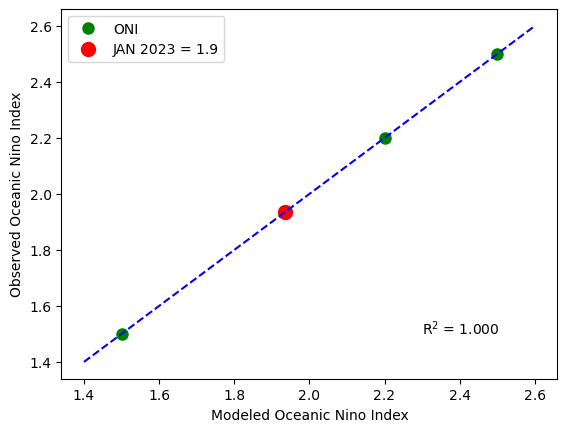

In [69]:
# plot the modeled vs observed values


plt.plot(modeled_values, jan_enso, 'g.', markersize=16 , label = 'ONI')
plt.plot(1.935, 1.935, 'r.', markersize=20, label = 'JAN 2023 = 1.9')
# label the x and y axis
plt.xlabel('Modeled Oceanic Nino Index')
plt.ylabel('Observed Oceanic Nino Index')

# add a label for the R^2
plt.text(2.3, 1.5, 'R$^2$ = ' + '{:.3f}'.format(r2))

# plot the 1-1 line
plt.plot([1.4, 2.6], [1.4, 2.6], 'b--')
plt.legend()
# make the axes equal
# plt.gca().set_xlim([24, 30])
# plt.gca().set_ylim([24, 30])

